In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from lib.RedDotsData import RedDotsData
from lib.FolderStructure import FolderStructure

#video_filename="V3__R_20180915_205551"
#video_filename="V6__R_20180915_212238"
#video_filename="V3_R_20180911_170159"
#video_filename="V2_R_20180911_165730"

#directory = "C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBlagopoluchiyaBay2018/"+video_filename+"/"
#directory="C:/Users/User/Documents/data/Kara/Video/V_Analysis/"+video_filename+"/"

# rootDir ="C:/workspaces/AnjutkaVideo/Kara_Sea_Crab_Video_st_5993_2018/"
rootDir = "C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBlagopoluchiyaBay2018/"

# videoFileName = "V4__R_20180915_210447"
# videoFileName = "V6__R_20180915_212238"
#videoFileName = "V3_R_20180911_170159"
videoFileName = "V2_R_20180911_165730"
# videoFileName = "V2_R_20180911_165730"

folderStruct = FolderStructure(rootDir, videoFileName)

#rdd = RedDotsData.createFromPandasDataFrame(data)
#data = pd.read_csv(input_filepath,delimiter="\t",na_values="(null)") # 24 errors

#data = data.sort_values(by=["frameNumber", "dotName"])
#data.count()[0]

rdd = RedDotsData.createFromFile(folderStruct.getRedDotsFilepath())
rdd.sort()
rdd.getCount()

3170

In [2]:
#data.tail(10)
newDF = rdd.onlyRedDot2()
newDF = newDF.reset_index()
nextFrameID = newDF["frameNumber"].shift(periods=-1)
gaps = nextFrameID - newDF["frameNumber"]
#newDF["gaps"] = gaps
value = gaps.max()
#gaps.ix[gaps['A'].idxmax()].values
value
#maxIdx = newDF.idxmax()
#maxIdx
#gaps.iloc[gaps.argmax()]
gaps.idxmax()
#gaps.loc[gaps.idxmax()]

594

In [3]:
#newDF.head(10)
#newDF["gaps"].max()
#newDF["gaps"].idxmax()
gaps.describe()
#newDF["gaps"]
#newDF.loc[1164, :]

count    1605.000000
mean        8.246106
std        21.632382
min         0.000000
25%         5.000000
50%         5.000000
75%         5.000000
max       327.000000
Name: frameNumber, dtype: float64

In [4]:
idx = pd.Index(gaps)
idx

Float64Index([5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0,
              ...
              5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, nan],
             dtype='float64', name=u'frameNumber', length=1606)

In [5]:
# gaps.index[value].tolist()
#idxOfMaxGap = idx.get_loc(value)
#idxOfMaxGap

In [6]:
idxOfMaxGap = gaps.idxmax() #gaps.index[int(value)].tolist()
idxOfMaxGap

594

In [7]:
gapStartFrameID = newDF.loc[idxOfMaxGap, :]["frameNumber"]
gapStartFrameID

4008

In [8]:
newDF.loc[newDF["frameNumber"] == gapStartFrameID]

,index,frameNumber,dotName,centerPoint_x,centerPoint_y,topLeft_x,topLeft_y,bottomRight_x,bottomRight_y,diagonal
594,1169,4008,redDot2,1145,586,NaN,NaN,NaN,NaN,NaN


In [9]:
gapEndFrameID = newDF.loc[idxOfMaxGap+1, :]["frameNumber"]
gapEndFrameID

4335

In [10]:
newDF.loc[newDF["frameNumber"] == gapEndFrameID]

,index,frameNumber,dotName,centerPoint_x,centerPoint_y,topLeft_x,topLeft_y,bottomRight_x,bottomRight_y,diagonal
595,1170,4335,redDot2,1143,583,1134.0,574.0,1153.0,593.0,26.870058


In [11]:
#rdd.replaceOutlierBetweenTwo()
rdd.getCount()

3170

In [12]:
#rdd.saveToFile(folderStruct.getRedDotsFilepath())

In [13]:
dataRedDot2 = rdd.onlyRedDot2()
dataRedDot2.count()[0]

1606

In [14]:
#dataRedDot2 = replaceOutlierBetweenTwo(dataRedDot2, 'centerPoint_x')
dataRedDot1 = rdd.onlyRedDot1()
dataRedDot1.count()[0]

1564

c:\old\python27\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


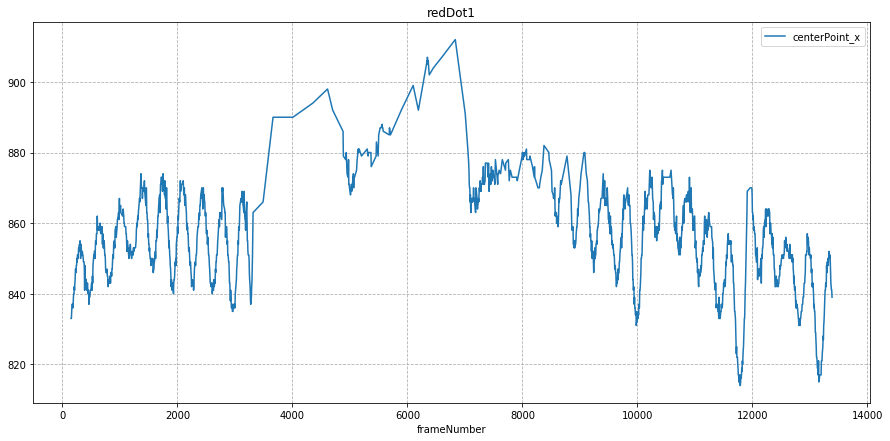

In [15]:
#dataRedDot1 = data.loc[data['dotName'] == 'redDot1']
dataRedDot1.plot(x='frameNumber', y=['centerPoint_x'],figsize=(15,7), title="redDot1")
dd = plt.gca()
dd.grid(which='major', axis='both', linestyle='--')

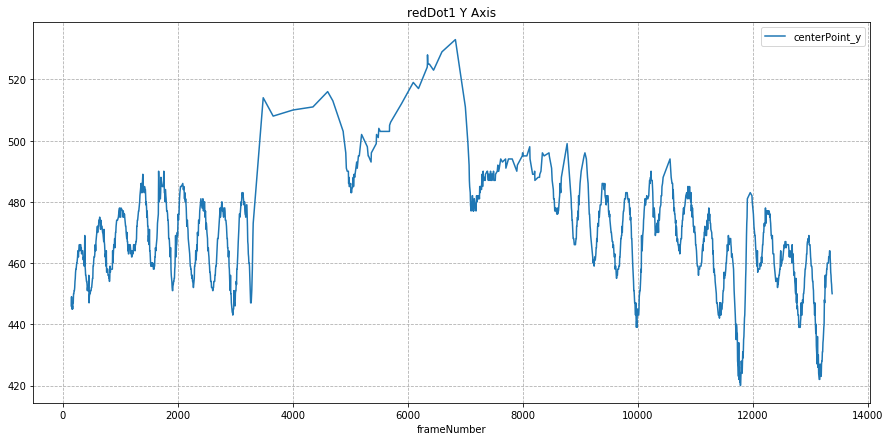

In [16]:
dataRedDot1.plot(x='frameNumber', y=['centerPoint_y'],figsize=(15,7), title="redDot1 Y Axis")
dd = plt.gca()
dd.grid(which='major', axis='both', linestyle='--')

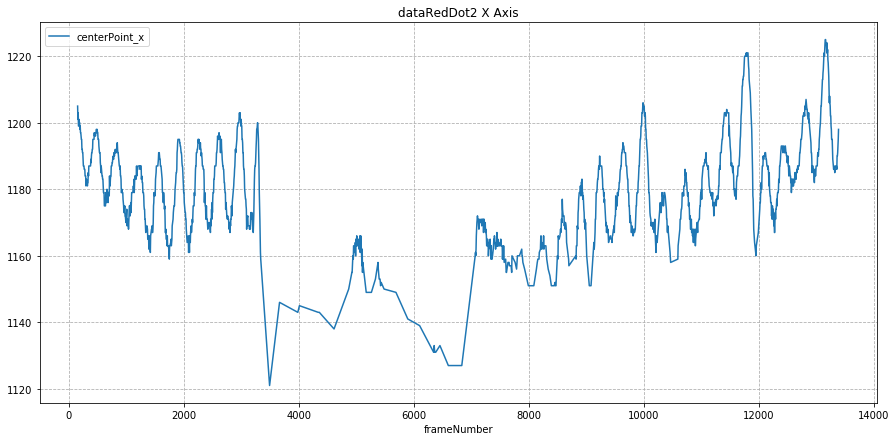

In [17]:
dataRedDot2.plot(x='frameNumber', y=['centerPoint_x'],figsize=(15,7), title="dataRedDot2 X Axis")
dd = plt.gca()
dd.grid(which='major', axis='both', linestyle='--')

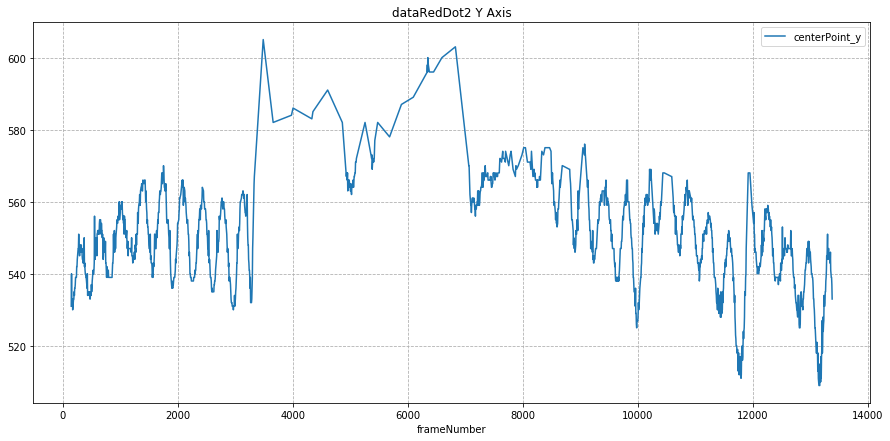

In [18]:
dataRedDot2.plot(x='frameNumber', y=['centerPoint_y'],figsize=(15,7), title="dataRedDot2 Y Axis")
dd = plt.gca()
dd.grid(which='major', axis='both', linestyle='--')

In [19]:
dfToPlot = rdd.forPlotting()
#dfToPlot.head(10)

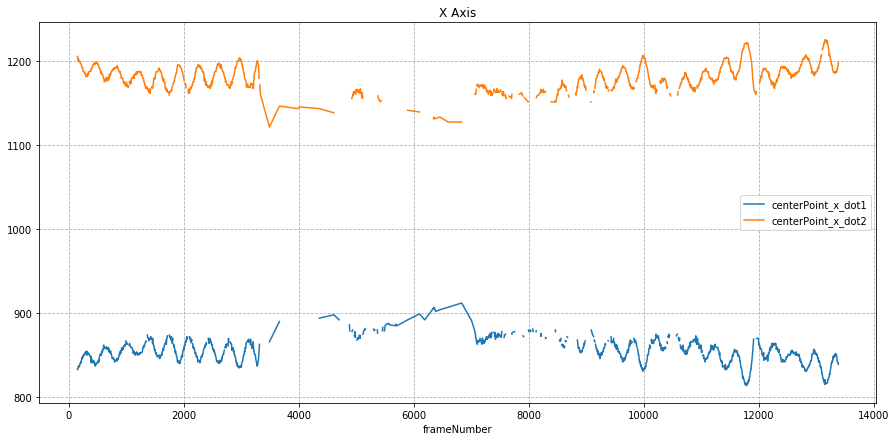

In [20]:
#dd.grid(True)
dfToPlot.plot(x='frameNumber', y=['centerPoint_x_dot1','centerPoint_x_dot2'],figsize=(15,7), title="X Axis")
dd = plt.gca()
dd.grid(which='major', axis='both', linestyle='--')

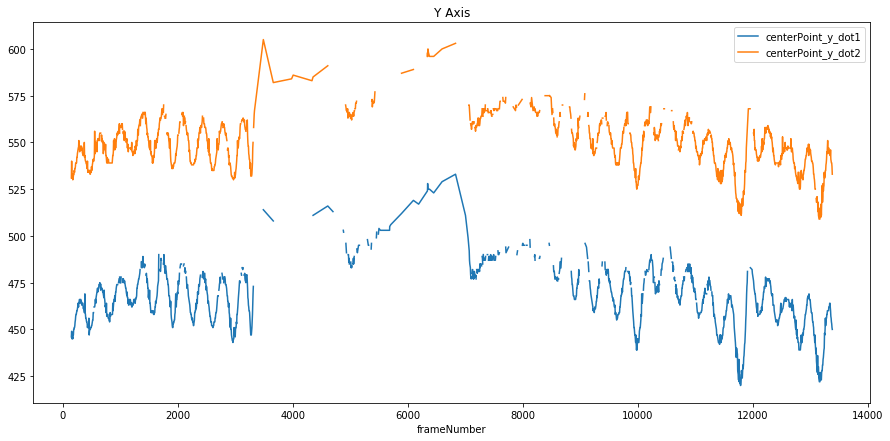

In [21]:
dfToPlot.plot(x='frameNumber', y=['centerPoint_y_dot1','centerPoint_y_dot2'],figsize=(15,7), title="Y Axis")
#dd = plt.gca()
#dd.grid(which='major', axis='both', linestyle='--')

In [22]:
dfToPlot.head(10)

,frameNumber,centerPoint_x_dot1,centerPoint_y_dot1,centerPoint_x_dot2,centerPoint_y_dot2
0,150,833.0,446.0,1205.0,531.0
1,155,833.0,449.0,1201.0,540.0
2,160,835.0,445.0,1203.0,531.0
3,165,837.0,445.0,1199.0,531.0
4,170,837.0,446.0,1199.0,533.0
5,175,837.0,445.0,1201.0,530.0
6,180,836.0,447.0,1200.0,531.0
7,185,837.0,447.0,1200.0,532.0
8,190,839.0,450.0,1198.0,533.0
9,195,840.0,450.0,1199.0,533.0


In [184]:
import numpy
df = dfToPlot.copy()
df = df.set_index("frameNumber")
#df

In [185]:
#minVal = df["frameNumber"].min()
#maxVal = df["frameNumber"].max()
minVal = df.index.min()
maxVal = df.index.max()
everyFrame = pd.DataFrame(numpy.arange(start=minVal, stop=maxVal,step=1),columns=["frameNumber"]).set_index("frameNumber")

In [186]:
df = df.combine_first(everyFrame).reset_index()
df.head(30)

,frameNumber,centerPoint_x_dot1,centerPoint_y_dot1,centerPoint_x_dot2,centerPoint_y_dot2
0,150,833.0,446.0,1205.0,531.0
1,151,NaN,NaN,NaN,NaN
2,152,NaN,NaN,NaN,NaN
3,153,NaN,NaN,NaN,NaN
4,154,NaN,NaN,NaN,NaN
5,155,833.0,449.0,1201.0,540.0
6,156,NaN,NaN,NaN,NaN
7,157,NaN,NaN,NaN,NaN
8,158,NaN,NaN,NaN,NaN
9,159,NaN,NaN,NaN,NaN


In [206]:
df = df.interpolate()
df.head(30)

,frameNumber,centerPoint_x_dot1,centerPoint_y_dot1,centerPoint_x_dot2,centerPoint_y_dot2,distance
0,150,833.0,446.0,1205.0,531.0,381.587474
1,151,833.0,446.6,1204.2,532.8,381.086864
2,152,833.0,447.2,1203.4,534.6,380.586253
3,153,833.0,447.8,1202.6,536.4,380.085643
4,154,833.0,448.4,1201.8,538.2,379.585033
5,155,833.0,449.0,1201.0,540.0,379.084423
6,156,833.4,448.2,1201.4,538.2,378.850606
7,157,833.8,447.4,1201.8,536.4,378.616788
8,158,834.2,446.6,1202.2,534.6,378.382970
9,159,834.6,445.8,1202.6,532.8,378.149152


In [208]:
df['distance'] = pow(pow(df["centerPoint_x_dot2"]-df["centerPoint_x_dot1"],2)+pow(df["centerPoint_y_dot2"]-df["centerPoint_y_dot1"],2),0.5).astype(int)
df.head(20)

,frameNumber,centerPoint_x_dot1,centerPoint_y_dot1,centerPoint_x_dot2,centerPoint_y_dot2,distance
0,150,833.0,446.0,1205.0,531.0,381
1,151,833.0,446.6,1204.2,532.8,381
2,152,833.0,447.2,1203.4,534.6,380
3,153,833.0,447.8,1202.6,536.4,380
4,154,833.0,448.4,1201.8,538.2,379
5,155,833.0,449.0,1201.0,540.0,379
6,156,833.4,448.2,1201.4,538.2,378
7,157,833.8,447.4,1201.8,536.4,378
8,158,834.2,446.6,1202.2,534.6,378
9,159,834.6,445.8,1202.6,532.8,378


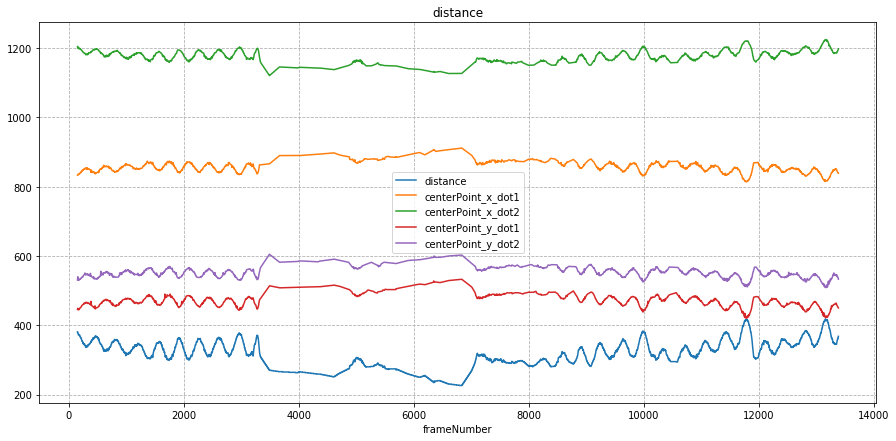

In [212]:
#dd.grid(True)
df.plot(x='frameNumber', y=['distance','centerPoint_x_dot1', 'centerPoint_x_dot2','centerPoint_y_dot1', 'centerPoint_y_dot2'],figsize=(15,7), title="distance")
dd = plt.gca()
dd.grid(which='major', axis='both', linestyle='--')